from google.colab import drive
drive.mount('/content/drive')

In [1]:
import os

In [2]:
os.chdir('C:\\Users\\peili\\Downloads\\Stroke Prediction')

In [3]:
os.getcwd()

'C:\\Users\\peili\\Downloads\\Stroke Prediction'

Import data

In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

path = 'Stroke.csv' 
data = pd.read_csv(path)
data = data.set_index(data.columns[0])
print(data)

       gender   age  hypertension  heart_disease ever_married work_type  \
id                                                                        
67     Female  17.0             0              0           No   Private   
77     Female  13.0             0              0           No  children   
84       Male  55.0             0              0          Yes   Private   
91     Female  42.0             0              0           No   Private   
99     Female  31.0             0              0           No   Private   
...       ...   ...           ...            ...          ...       ...   
72911  Female  57.0             1              0          Yes   Private   
72914  Female  19.0             0              0           No   Private   
72915  Female  45.0             0              0          Yes   Private   
72918  Female  53.0             1              0          Yes   Private   
72940  Female   2.0             0              0           No  children   

      Residence_type  av

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 67 to 72940
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


Data Description

1) id: unique identifier
- delete id, replace with index

2) gender: "Male", "Female" or "Other" 
- Remove other

3) age: age of the patient
- Detect Outlier

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood
- Detect Outlier

10) bmi: body mass index
- Remove N/A 
- Detect Outlier

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12) stroke: 1 if the patient had a stroke or 0 if not

Remove N/A and outliers (Timothy)
- BMI (Remove Outlier + imputation - average replace N/A)
- Remove id
- Sorting Data (Based on index)

Data Encoding
- Gender
- Ever_Married
- Work type
- Residence type
- Smoking status

EDA
- Description statistic (Mean, Min, Max......)
- Graph

Feature Selection
-Correlation Matrix

# Data Pre-Processing

## Data Overview

In [6]:
data.head(20)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
67,Female,17.0,0,0,No,Private,Urban,92.97,NaN,formerly smoked,0
77,Female,13.0,0,0,No,children,Rural,85.81,18.6,Unknown,0
84,Male,55.0,0,0,Yes,Private,Urban,89.17,31.5,never smoked,0
91,Female,42.0,0,0,No,Private,Urban,98.53,18.5,never smoked,0
99,Female,31.0,0,0,No,Private,Urban,108.89,52.3,Unknown,0
121,Female,38.0,0,0,Yes,Private,Urban,91.44,NaN,Unknown,0
129,Female,24.0,0,0,No,Private,Urban,97.55,26.2,never smoked,0
132,Female,80.0,0,0,Yes,Govt_job,Urban,84.86,NaN,Unknown,0
156,Female,33.0,0,0,Yes,Private,Rural,86.97,42.2,never smoked,0


## Handling outliers/missing data

### Removing Outliers & Irrelevant Data

In [7]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


<Axes: >

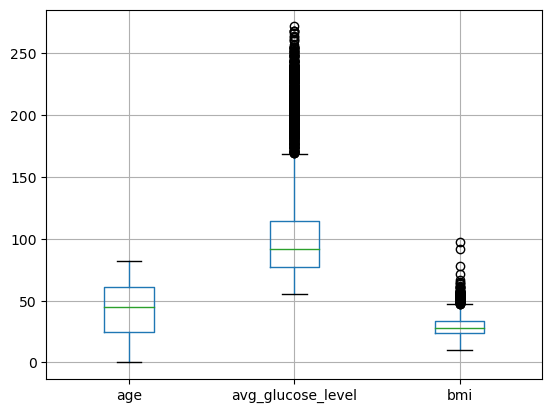

In [8]:
data.boxplot(column=["age","avg_glucose_level","bmi"])

In [9]:
outliers = data[(data['avg_glucose_level'] >= 240.0) | (data['bmi'] >= 50)].index
data.drop(outliers, inplace=True)
data.head(15)

data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4976.000000,4976.00000,4976.000000,4976.000000,4779.000000,4976.000000
mean,42.946141,0.09365,0.053055,104.296881,28.409605,0.047629
std,22.696149,0.29137,0.224165,42.562051,7.007670,0.213001
min,0.080000,0.00000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.00000,0.000000,77.055000,23.400000,0.000000
50%,44.000000,0.00000,0.000000,91.530000,27.900000,0.000000
75%,61.000000,0.00000,0.000000,112.800000,32.700000,0.000000
max,82.000000,1.00000,1.000000,239.950000,49.900000,1.000000


- WHO considered a normal blood glucose level (mg/dl) of between 70-140 and anything above 140 is considered pre diabetic and around 180-220 is considered diabetic. The cutoff point is set at 240 mg/dl
- Anything above 40 in BMI is considereed clinically obese, hence cutoff point at 50 should be logical

In [10]:
irr_data = data[(data['gender']=="Other")].index
data.drop(irr_data, inplace=True)

- For consistency, we remove the "Other" in gender as well

### Missing Data Imputation

Since we have removed the outliers and irrelevant data, we can safely impute the missing values using mean imputation

In [11]:
data.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  197
smoking_status         0
stroke                 0
dtype: int64

In [12]:
data.fillna(data.mean())
data = data.fillna(data.mean())

C:\Users\peili\AppData\Local\Temp\ipykernel_18588\2546835203.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean())
C:\Users\peili\AppData\Local\Temp\ipykernel_18588\2546835203.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


In [13]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4975.000000,4975.000000,4975.000000,4975.000000,4975.000000,4975.000000
mean,42.949548,0.093668,0.053065,104.289035,28.410862,0.047638
std,22.697159,0.291396,0.224186,42.562731,6.867685,0.213021
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.050000,23.600000,0.000000
50%,44.000000,0.000000,0.000000,91.530000,28.200000,0.000000
75%,61.000000,0.000000,0.000000,112.780000,32.500000,0.000000
max,82.000000,1.000000,1.000000,239.950000,49.900000,1.000000


###Rearranging index

In [14]:
cleaned_data = data.reset_index(drop=True)
cleaned_data.index = cleaned_data.index + 1

cleaned_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,Female,17.0,0,0,No,Private,Urban,92.97,28.410862,formerly smoked,0
2,Female,13.0,0,0,No,children,Rural,85.81,18.600000,Unknown,0
3,Male,55.0,0,0,Yes,Private,Urban,89.17,31.500000,never smoked,0
4,Female,42.0,0,0,No,Private,Urban,98.53,18.500000,never smoked,0
5,Female,38.0,0,0,Yes,Private,Urban,91.44,28.410862,Unknown,0


# Exploratory Data Analysis - EDA

### Basic Information about data
Basic information and descriptive statistic about the data

In [15]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4975 entries, 1 to 4975
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4975 non-null   object 
 1   age                4975 non-null   float64
 2   hypertension       4975 non-null   int64  
 3   heart_disease      4975 non-null   int64  
 4   ever_married       4975 non-null   object 
 5   work_type          4975 non-null   object 
 6   Residence_type     4975 non-null   object 
 7   avg_glucose_level  4975 non-null   float64
 8   bmi                4975 non-null   float64
 9   smoking_status     4975 non-null   object 
 10  stroke             4975 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 427.7+ KB


In [16]:
cleaned_data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4975.000000,4975.000000,4975.000000,4975.000000,4975.000000,4975.000000
mean,42.949548,0.093668,0.053065,104.289035,28.410862,0.047638
std,22.697159,0.291396,0.224186,42.562731,6.867685,0.213021
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.050000,23.600000,0.000000
50%,44.000000,0.000000,0.000000,91.530000,28.200000,0.000000
75%,61.000000,0.000000,0.000000,112.780000,32.500000,0.000000
max,82.000000,1.000000,1.000000,239.950000,49.900000,1.000000


### Duplicate Data
Check existence of duplicate data and remove it if exist

In [17]:
cleaned_data.duplicated().sum()

0


*   No duplicate data found in this data set

### Null Values
Check existence of null values

In [18]:
cleaned_data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


*   All null values are cleaned in data pre-processing

### Unique Values
Check the unique values of each column

In [19]:
cleaned_data['gender'].unique()

array(['Female', 'Male'], dtype=object)

Remarks
*   Female - 0
*   Male - 1






In [20]:
cleaned_data['age'].unique()

array([1.70e+01, 1.30e+01, 5.50e+01, 4.20e+01, 3.80e+01, 2.40e+01,
       8.00e+01, 3.30e+01, 2.00e+01, 4.30e+01, 8.00e+00, 8.10e+01,
       2.30e+01, 4.00e+00, 3.10e+01, 7.90e+01, 4.10e+01, 4.50e+01,
       1.60e+01, 6.50e+01, 5.80e+01, 4.40e+01, 7.80e+01, 4.90e+01,
       4.80e+01, 3.70e+01, 4.60e+01, 5.90e+01, 7.40e+01, 2.80e+01,
       1.20e+01, 3.00e+00, 5.40e+01, 9.00e+00, 1.40e+01, 6.90e+01,
       5.20e+01, 8.20e+01, 1.00e+01, 7.30e+01, 3.90e+01, 5.00e+00,
       8.00e-01, 3.20e+01, 3.40e+01, 6.00e+01, 7.00e+00, 1.80e+01,
       7.00e+01, 6.10e+01, 7.70e+01, 1.50e+01, 4.70e+01, 6.80e+01,
       6.20e+01, 8.80e-01, 1.88e+00, 7.10e+01, 3.50e+01, 2.90e+01,
       6.40e+01, 3.00e+01, 5.10e+01, 6.30e+01, 7.20e-01, 4.00e+01,
       7.50e+01, 6.70e+01, 2.50e+01, 2.60e+01, 1.90e+01, 5.60e+01,
       6.60e+01, 5.70e+01, 5.00e+01, 7.20e+01, 5.30e+01, 3.60e+01,
       2.00e+00, 2.20e+01, 2.70e+01, 2.10e+01, 7.60e+01, 1.10e+01,
       1.32e+00, 6.00e+00, 5.60e-01, 6.40e-01, 1.60e-01, 1.80e

In [21]:
cleaned_data['hypertension'].unique()

array([0, 1], dtype=int64)

Remarks
*   No - 0
*   Yes - 1

In [22]:
cleaned_data['heart_disease'].unique()

array([0, 1], dtype=int64)

Remarks
*   No - 0
*   Yes - 1

In [23]:
cleaned_data['ever_married'].unique()

array(['No', 'Yes'], dtype=object)

Remarks
*   No - 0
*   Yes - 1

In [24]:
cleaned_data['work_type'].unique()

array(['Private', 'children', 'Govt_job', 'Self-employed', 'Never_worked'],
      dtype=object)

Remarks
*   Govt_job - 0
*   Never_worked - 1
*   Private - 2
*   Self-employed - 3
*   children - 4

In [25]:
cleaned_data['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

Remarks
*   Rural - 0
*   Urban - 1

In [26]:
cleaned_data['avg_glucose_level'].unique()

array([ 92.97,  85.81,  89.17, ..., 172.33,  62.55, 102.92])

In [27]:
cleaned_data['bmi'].unique()

array([28.41086229, 18.6       , 31.5       , 18.5       , 26.2       ,
       42.2       , 28.8       , 27.6       , 37.6       , 31.4       ,
       17.5       , 31.6       , 24.9       , 39.7       , 36.4       ,
       28.4       , 28.9       , 25.7       , 26.8       , 41.3       ,
       37.        , 24.1       , 23.9       , 31.        , 26.6       ,
       23.1       , 20.9       , 21.4       , 36.2       , 20.1       ,
       22.8       , 40.1       , 22.2       , 26.5       , 24.3       ,
       44.7       , 30.4       , 34.3       , 20.7       , 33.1       ,
       27.3       , 37.8       , 23.4       , 29.5       , 22.4       ,
       24.2       , 17.        , 32.2       , 23.3       , 30.        ,
       28.7       , 21.3       , 26.7       , 22.1       , 27.2       ,
       39.3       , 27.1       , 38.8       , 28.5       , 18.9       ,
       40.8       , 21.5       , 16.3       , 23.5       , 30.1       ,
       22.7       , 42.6       , 35.9       , 26.1       , 43.  

In [28]:
cleaned_data['smoking_status'].unique()

array(['formerly smoked', 'Unknown', 'never smoked', 'smokes'],
      dtype=object)

Remarks
*   Unknown - 0
*   formerly smoked - 1
*   never smoked - 2
*   smokes - 3

In [29]:
cleaned_data['stroke'].unique()

array([0, 1], dtype=int64)

Remarks
*   No - 0
*   Yes - 1

### Visualize the Unique Counts

Gender

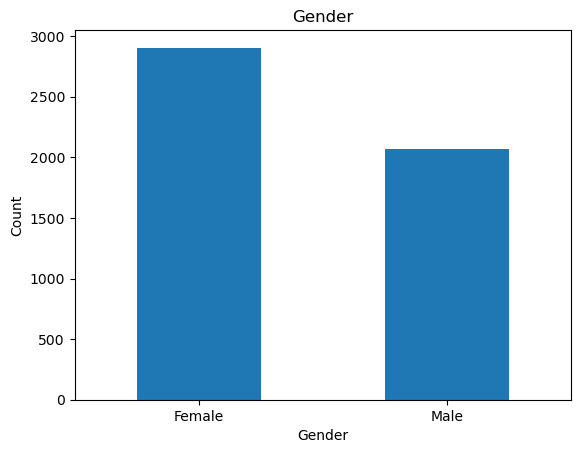

In [30]:
cleaned_data.gender.value_counts().plot(kind="bar")
plt.title("Gender")
plt.xlabel("Gender")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

Remarks:
*   Female - 0
*   Male - 1






*   Female patient is more than male patient

Age

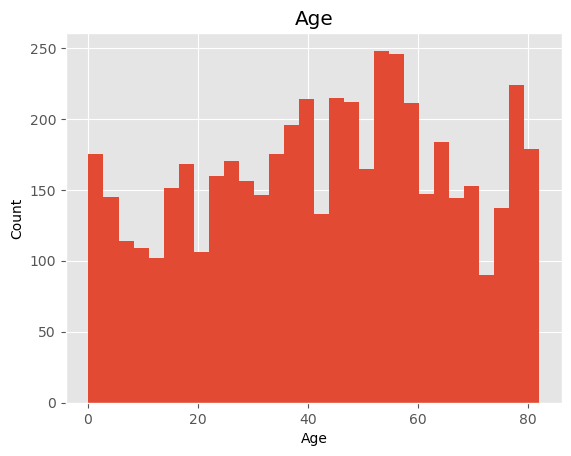

In [31]:
plt.style.use('ggplot')
plt.hist(cleaned_data.age, bins=30)
plt.title("Age")
plt.xlabel("Age")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

In [32]:
print(f"Skewness: {cleaned_data['age'].skew()}")
print(f"Kurtosis: {cleaned_data['age'].kurt()}")

Skewness: -0.12200244230411943
Kurtosis: -1.0046458423956799



*   Age is negative skewed distribution
*   Age is platykurtic distribution



Hypertension

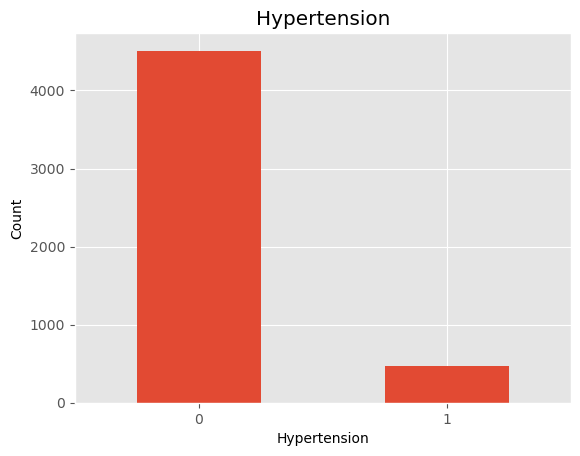

In [33]:
cleaned_data.hypertension.value_counts().plot(kind="bar")
plt.title("Hypertension")
plt.xlabel("Hypertension")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

Remarks
*   No - 0
*   Yes - 1

*   Patient doesn't have hypertension is more than patient has hypertension

Heart disease

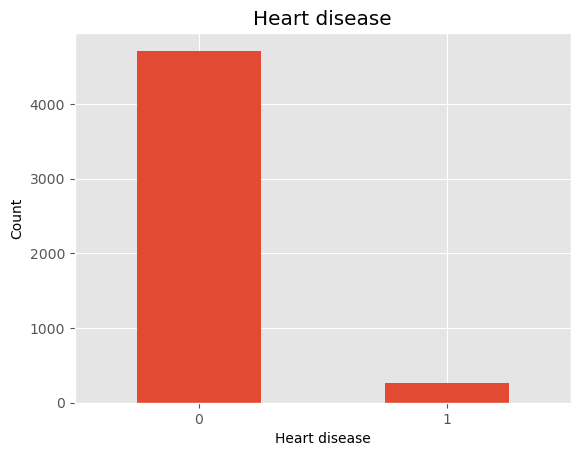

In [34]:
cleaned_data.heart_disease.value_counts().plot(kind="bar")
plt.title("Heart disease")
plt.xlabel("Heart disease")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

Remarks
*   No - 0
*   Yes - 1

*   Patient doesn't have any heart disease is more than patient has a heart disease

Marital status (ever married)

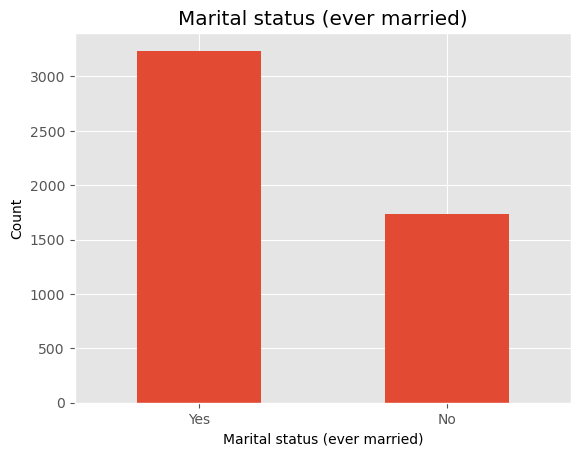

In [35]:
cleaned_data.ever_married.value_counts().plot(kind="bar")
plt.title("Marital status (ever married)")
plt.xlabel("Marital status (ever married)")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

Remarks
*   No - 0
*   Yes - 1

*   Patient ever married is more than patient no even married

Work type

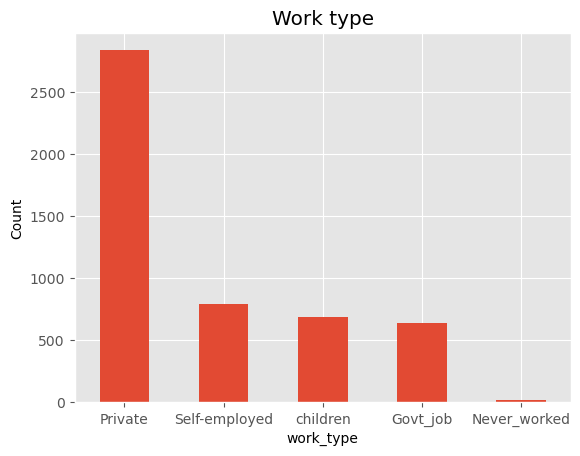

In [36]:
cleaned_data.work_type.value_counts().plot(kind="bar")
plt.title("Work type")
plt.xlabel("work_type")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

Remarks
*   Govt_job - 0
*   Never_worked - 1
*   Private - 2
*   Self-employed - 3
*   children - 4

*   Most of the patients work in private sector

Residence type

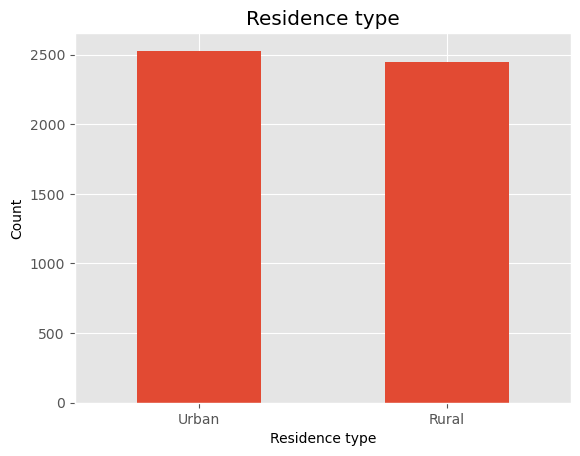

In [37]:
cleaned_data.Residence_type.value_counts().plot(kind="bar")
plt.title("Residence type")
plt.xlabel("Residence type")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

Remarks
*   Rural - 0
*   Urban - 1

*   Patients live in urban is slightly more than patients live in rural

Average glucose level

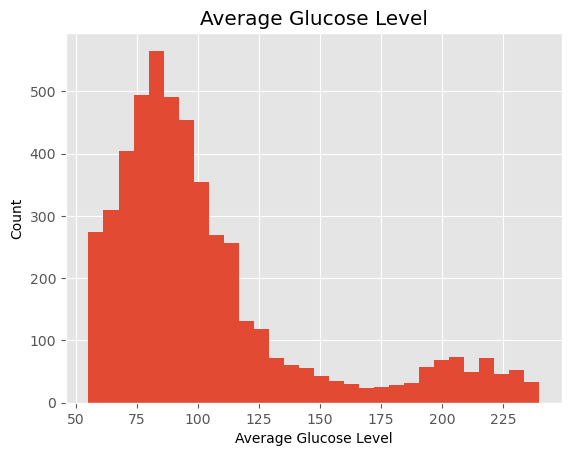

In [38]:
plt.style.use('ggplot')
plt.hist(cleaned_data.avg_glucose_level, bins=30)
plt.title("Average Glucose Level")
plt.xlabel("Average Glucose Level")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

In [39]:
print(f"Skewness: {cleaned_data['avg_glucose_level'].skew()}")
print(f"Kurtosis: {cleaned_data['avg_glucose_level'].kurt()}")

Skewness: 1.5701915069239691
Kurtosis: 1.7318018254143444



*   Average glucose level is positive skewed distribution
*   Average glucose level is leptokurtic distribution



BMI

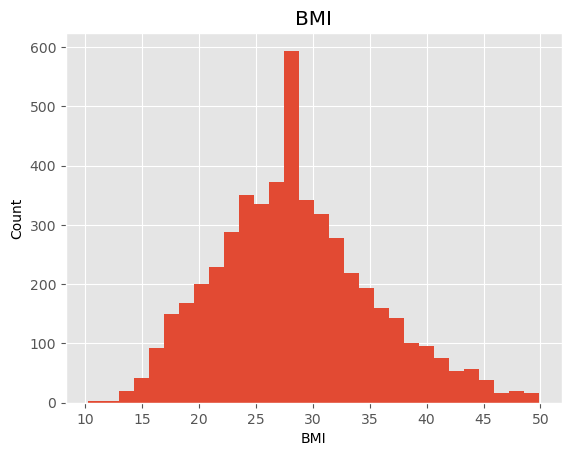

In [40]:
plt.style.use('ggplot')
plt.hist(cleaned_data.bmi, bins=30)
plt.title("BMI")
plt.xlabel("BMI")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

In [41]:
print(f"Skewness: {cleaned_data['bmi'].skew()}")
print(f"Kurtosis: {cleaned_data['bmi'].kurt()}")

Skewness: 0.4089220096789677
Kurtosis: 0.004919394040483027



*   BMI is approximately symmetric distribution
*   BMI is mesokurtic distribution



Smoking status

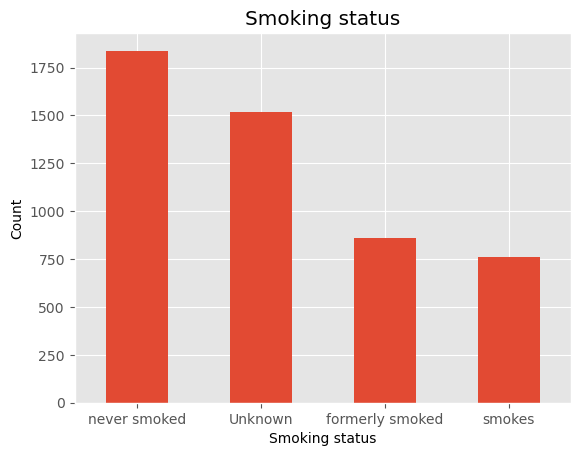

In [42]:
cleaned_data.smoking_status.value_counts().plot(kind="bar")
plt.title("Smoking status")
plt.xlabel("Smoking status")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

Remarks
*   Unknown - 0
*   formerly smoked - 1
*   never smoked - 2
*   smokes - 3

*   Most of the patients never smoked

Stroke

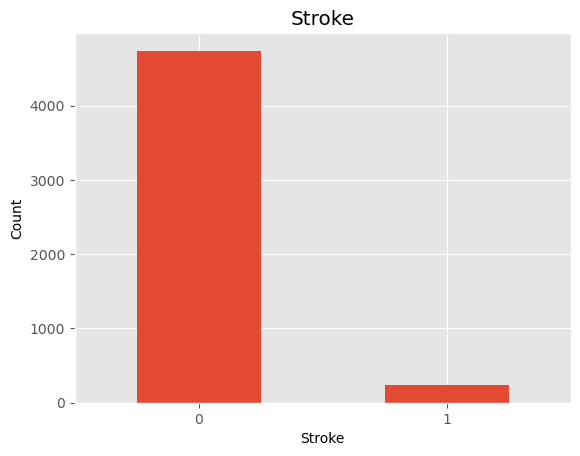

In [43]:
cleaned_data.stroke.value_counts().plot(kind="bar")
plt.title("Stroke")
plt.xlabel("Stroke")
plt.xticks(rotation=0)
plt.ylabel("Count")
# Create a bar chart
plt.show()

Remarks
*   No - 0
*   Yes - 1

*   Patient doesn't have a stroke is more than patient had a stroke

Summary of Chart

In [44]:
import matplotlib.pyplot as plt

# Create a figure with 3 rows and 4 columns of subplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))

#Set the spacing between the subplots
fig.subplots_adjust(hspace=1.0,wspace=0.5)

# Plot the data for each subplot
cleaned_data.gender.value_counts().plot(kind="bar", ax=axes[0, 0])
axes[0, 0].set_title("Gender")
axes[0, 0].set_xlabel("Gender")
axes[0, 0].set_ylabel("Count")

axes[0, 1].hist(cleaned_data.age, bins=30)
axes[0, 1].set_title("Age")
axes[0, 1].set_xlabel("Age")
axes[0, 1].set_ylabel("Count")

cleaned_data.hypertension.value_counts().plot(kind="bar", ax=axes[0, 2])
axes[0, 2].set_title("Hypertension")
axes[0, 2].set_xlabel("Hypertension")
axes[0, 2].set_ylabel("Count")

cleaned_data.heart_disease.value_counts().plot(kind="bar", ax=axes[0, 3])
axes[0, 3].set_title("Heart disease")
axes[0, 3].set_xlabel("Heart disease")
axes[0, 3].set_ylabel("Count")

cleaned_data.ever_married.value_counts().plot(kind="bar", ax=axes[1, 0])
axes[1, 0].set_title("Marital status (ever married)")
axes[1, 0].set_xlabel("Marital status (ever married)")
axes[1, 0].set_ylabel("Count")

cleaned_data.work_type.value_counts().plot(kind="bar", ax=axes[1, 1])
axes[1, 1].set_title("Work type")
axes[1, 1].set_xlabel("work_type")
axes[1, 1].set_ylabel("Count")

cleaned_data.Residence_type.value_counts().plot(kind="bar", ax=axes[1, 2])
axes[1, 2].set_title("Residence type")
axes[1, 2].set_xlabel("Residence type")
axes[1, 2].set_ylabel("Count")

axes[1, 3].hist(cleaned_data.avg_glucose_level, bins=30)
axes[1, 3].set_title("Average Glucose Level")
axes[1, 3].set_xlabel("Average Glucose Level")
axes[1, 3].set_ylabel("Count")

axes[2, 0].hist(cleaned_data.bmi, bins=30)
axes[2, 0].set_title("BMI")
axes[2, 0].set_xlabel("BMI")
axes[2, 0].set_ylabel("Count")

cleaned_data.smoking_status.value_counts().plot(kind="bar", ax=axes[2, 1])
axes[2, 1].set_title("Smoking status")
axes[2, 1].set_xlabel("Smoking status")
axes[2, 1].set_ylabel("Count")

cleaned_data.stroke.value_counts().plot(kind="bar", ax=axes[2, 2])
axes[2, 2].set_title("Stroke")
axes[2, 2].set_xlabel("Stroke")
axes[2, 2].set_ylabel("Count")

# Hide the remaining subplots
axes[2, 3].axis("off")



(0.0, 1.0, 0.0, 1.0)

# Data Encoding

1.  Gender
*   Female - 0
*   Male - 1


2.  Ever_Married
*   No - 0
*   Yes - 1

3.  Work type
*   Govt_job - 0
*   Never_worked - 1
*   Private - 2
*   Self-employed - 3
*   children - 4

4.  Residence type
*   Rural - 0
*   Urban - 1

5.  Smoking status
*   Unknown - 0
*   formerly smoked - 1
*   never smoked - 2
*   smokes - 3

### Gender

In [45]:
cleaned_data['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [46]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
  
cleaned_data['gender']= label_encoder.fit_transform(cleaned_data['gender'])
cleaned_data['gender'].unique()

array([0, 1])

### Ever_married

In [47]:
cleaned_data['ever_married'].unique()

array(['No', 'Yes'], dtype=object)

In [48]:
cleaned_data['ever_married']= label_encoder.fit_transform(cleaned_data['ever_married'])
cleaned_data['ever_married'].unique()

array([0, 1])

### Work_type

In [49]:
cleaned_data['work_type'].unique()

array(['Private', 'children', 'Govt_job', 'Self-employed', 'Never_worked'],
      dtype=object)

In [50]:
cleaned_data['work_type']= label_encoder.fit_transform(cleaned_data['work_type'])
cleaned_data['work_type'].unique()

array([2, 4, 0, 3, 1])

### Residence_type

In [51]:
cleaned_data['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [52]:
cleaned_data['Residence_type']= label_encoder.fit_transform(cleaned_data['Residence_type'])
cleaned_data['Residence_type'].unique()

array([1, 0])

### smoking_status

In [53]:
cleaned_data['smoking_status'].unique()

array(['formerly smoked', 'Unknown', 'never smoked', 'smokes'],
      dtype=object)

In [54]:
cleaned_data['smoking_status']= label_encoder.fit_transform(cleaned_data['smoking_status'])
cleaned_data['smoking_status'].unique()

array([1, 0, 2, 3])

In [55]:
print(cleaned_data)

      gender   age  hypertension  heart_disease  ever_married  work_type  \
1          0  17.0             0              0             0          2   
2          0  13.0             0              0             0          4   
3          1  55.0             0              0             1          2   
4          0  42.0             0              0             0          2   
5          0  38.0             0              0             1          2   
...      ...   ...           ...            ...           ...        ...   
4971       1  47.0             0              0             1          2   
4972       0  19.0             0              0             0          2   
4973       0  45.0             0              0             1          2   
4974       0  53.0             1              0             1          2   
4975       0   2.0             0              0             0          4   

      Residence_type  avg_glucose_level        bmi  smoking_status  stroke  
1         

### Correlation

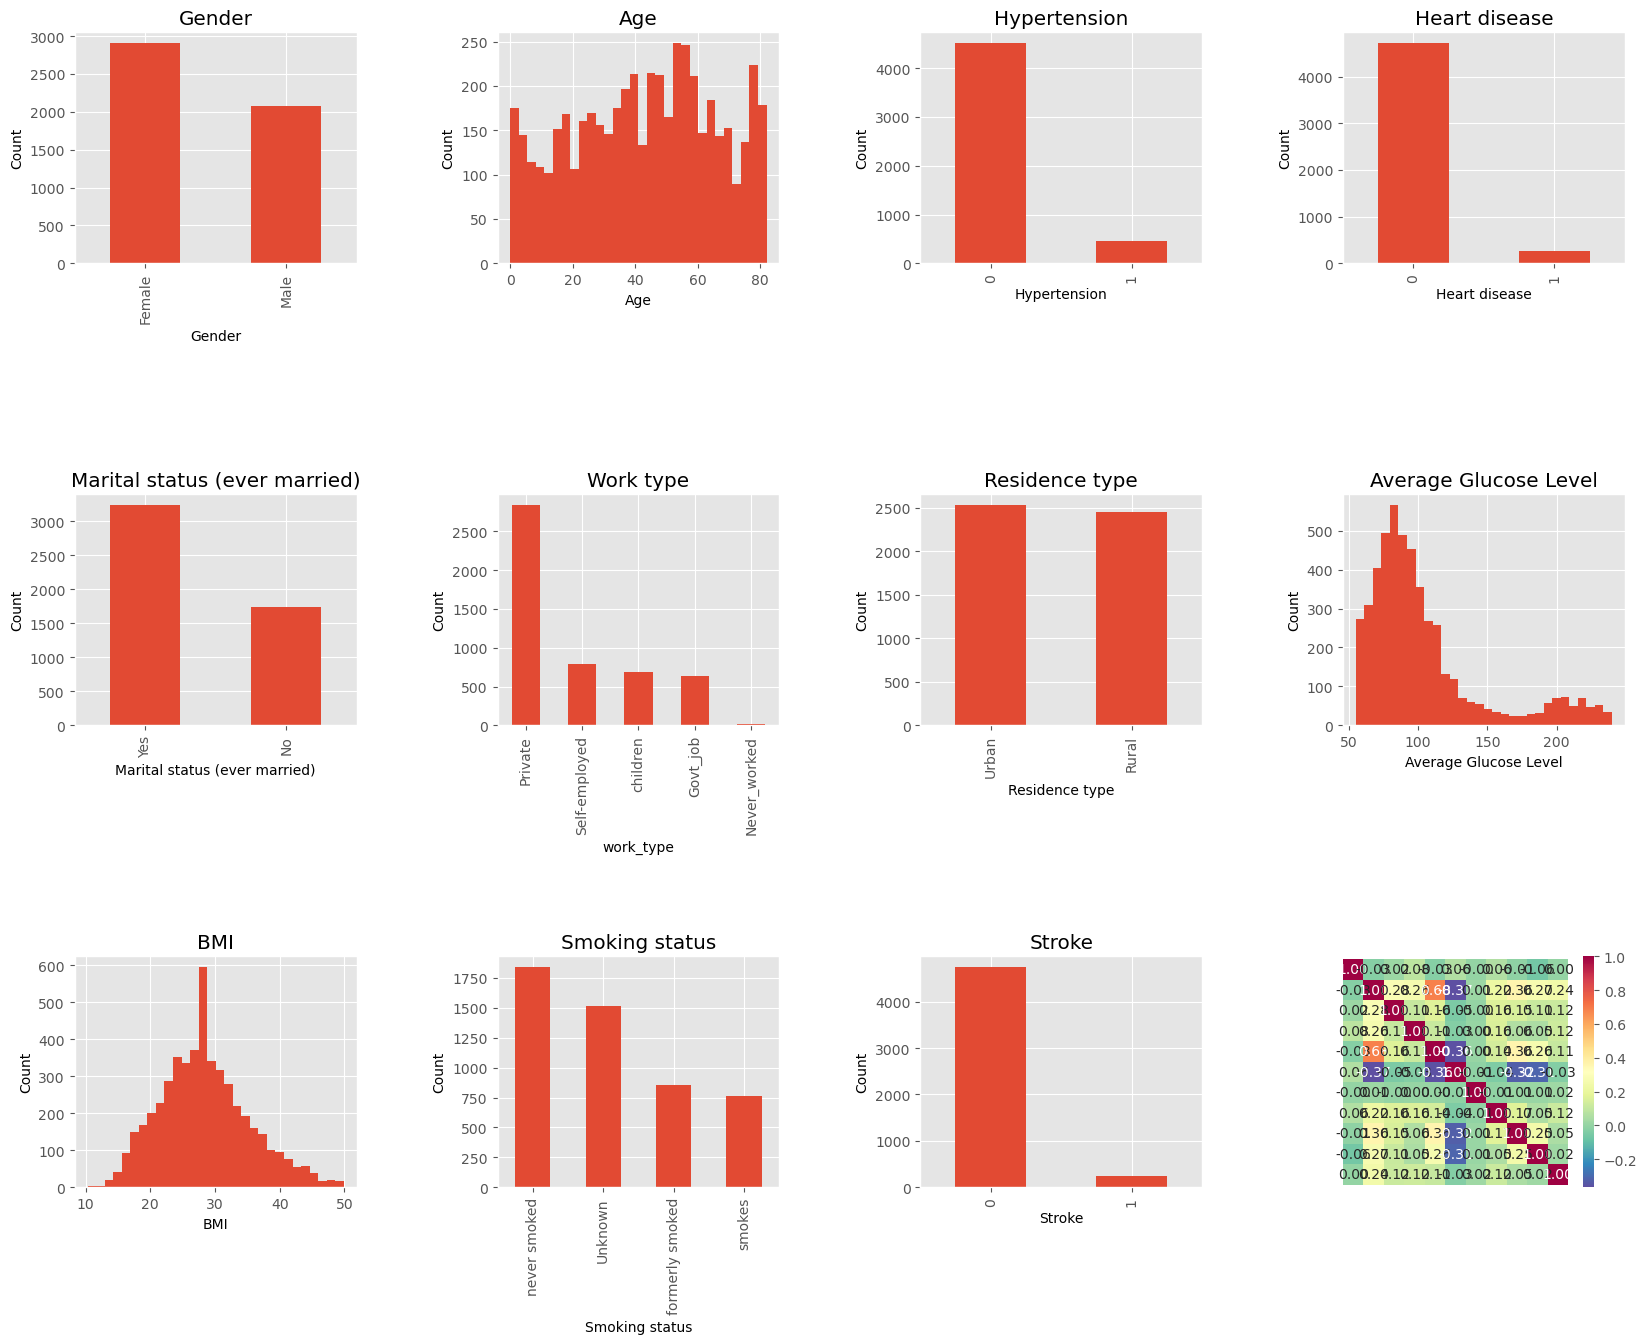

In [56]:
corrmat = cleaned_data.corr()
hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 10}, 
                 yticklabels=cleaned_data.columns, 
                 xticklabels=cleaned_data.columns, 
                 cmap="Spectral_r")
plt.show()

- The correlation between features and stroke that less than 0.1: 

> Gender 

> Work Type

> Residence Type

>BMI

>Smoking Status


- The correlation between features and stroke that more than 0.1: 

>Age

>Hypertension

>Heart Disease

>Ever Married

>Average Glucose Level




## Pei Lin Modelling Part

### two-class logistic regression

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [58]:
cleaned_data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,0,17.0,0,0,0,2,1,92.97,28.410862,1,0
2,0,13.0,0,0,0,4,0,85.81,18.600000,0,0
3,1,55.0,0,0,1,2,1,89.17,31.500000,2,0
4,0,42.0,0,0,0,2,1,98.53,18.500000,2,0
5,0,38.0,0,0,1,2,1,91.44,28.410862,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4971,1,47.0,0,0,1,2,0,75.30,25.000000,1,0
4972,0,19.0,0,0,0,2,1,90.57,24.200000,0,0
4973,0,45.0,0,0,1,2,1,172.33,45.300000,1,0
4974,0,53.0,1,0,1,2,1,62.55,30.300000,0,1


In [59]:
# Select the features and the target variable
X = cleaned_data.drop("stroke", axis=1)
y = cleaned_data["stroke"]

In [60]:
from imblearn.under_sampling import RandomUnderSampler

In [61]:
rus = RandomUnderSampler(sampling_strategy=0.4, random_state=42)

In [62]:
X_resampled, Y_resampled = rus.fit_resample(X, y)

In [63]:
# Create the final DataFrame with the undersampled data
cleaned_data = pd.concat([X_resampled, Y_resampled], axis=1)

In [64]:
cleaned_data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,41.0,0,0,1,2,0,134.29,26.800000,3,0
1,0,60.0,0,0,1,3,1,203.04,28.410862,3,0
2,1,4.0,0,0,0,4,1,85.88,17.700000,0,0
3,0,17.0,0,0,0,2,0,88.65,30.300000,2,0
4,0,34.0,0,0,0,2,0,103.43,43.600000,3,0
...,...,...,...,...,...,...,...,...,...,...,...
824,0,79.0,0,0,1,2,1,110.85,24.100000,1,1
825,0,70.0,0,1,1,2,0,59.35,32.300000,1,1
826,0,57.0,1,0,1,0,0,67.41,32.900000,2,1
827,1,76.0,0,0,1,2,1,104.47,20.300000,0,1


In [65]:
cleaned_data.to_csv("cleaneddata_0607.csv", index=False)

In [66]:
# Select the features and the target variable
X = cleaned_data.drop("stroke", axis=1)
y = cleaned_data["stroke"]

In [67]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [68]:
# Save the trsting dataset as a CSV file
X_train.to_csv("training_data.csv", index=False)

In [69]:
# Create a logistic regression model
model = LogisticRegression(max_iter=1000)

In [70]:
# Train the model
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [71]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [72]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

In [73]:
# Print the evaluation metrics with 4 decimal places
print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1-Score: {:.4f}".format(f1))
print("AUC: {:.4f}".format(auc))

Accuracy: 0.7671
Precision: 0.6324
Recall: 0.5658
F1-Score: 0.5972
AUC: 0.7106


In [74]:
from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[148  25]
 [ 33  43]]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


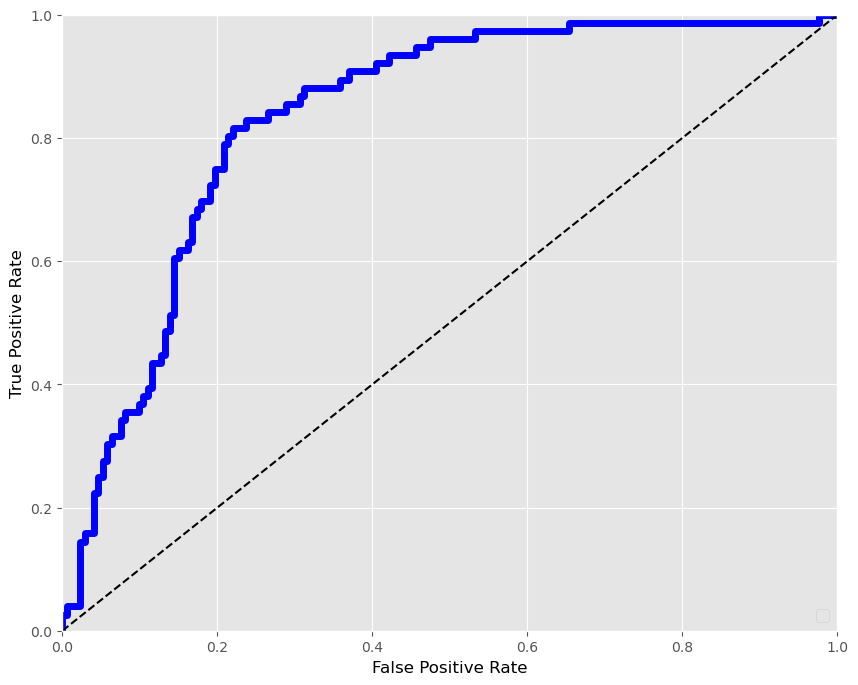

In [75]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
import numpy as np

# Calculate the decision function values for the test set
decision_values = model.decision_function(X_test)

# Calculate the predicted probabilities using the sigmoid function
probability_pred = 1 / (1 + np.exp(-decision_values))

# Calculate the false positive rate (fpr) and true positive rate (tpr)
fpr, tpr, _ = roc_curve(y_test, probability_pred)

# Calculate the AUC score
auc = roc_auc_score(y_test, probability_pred)

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', linewidth=5)
plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(loc='lower right', fontsize=12, handlelength=0)
plt.grid(True)
plt.show()


### two-class SVM

In [76]:
from sklearn.svm import SVC

In [77]:
model = SVC()

In [78]:
# Train the model
model.fit(X_train, y_train)

SVC()

In [79]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [80]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

In [81]:
# Print the evaluation metrics with 4 decimal places
print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1-Score: {:.4f}".format(f1))
print("AUC: {:.4f}".format(auc))

Accuracy: 0.7871
Precision: 0.6456
Recall: 0.6711
F1-Score: 0.6581
AUC: 0.7546


In [82]:
from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[145  28]
 [ 25  51]]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


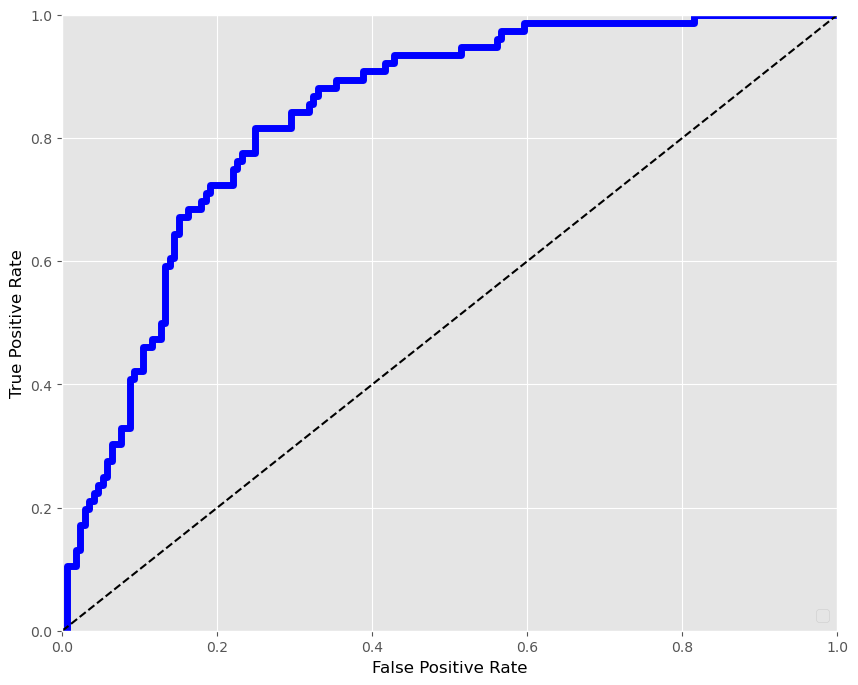

In [83]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
import numpy as np

# Calculate the decision function values for the test set
decision_values = model.decision_function(X_test)

# Calculate the predicted probabilities using the sigmoid function
probability_pred = 1 / (1 + np.exp(-decision_values))

# Calculate the false positive rate (fpr) and true positive rate (tpr)
fpr, tpr, _ = roc_curve(y_test, probability_pred)

# Calculate the AUC score
auc = roc_auc_score(y_test, probability_pred)

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', linewidth=5)
plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(loc='lower right', fontsize=12, handlelength=0)
plt.grid(True)
plt.show()

In [84]:
import pickle
from sklearn.svm import SVC

# Create an SVM classifier
model = SVC()

# Train the model
model.fit(X_train, y_train)

# Save the trained model as a pickle file
with open("svm_model.pkl", "wb") as file:
    pickle.dump(model, file)

In [85]:
feature_names = X_train.columns.tolist()
print("Feature names used during training:")
print(feature_names)

Feature names used during training:
['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']


### Two-class neural network

## Two class Decision Forest

## Two class Bayes point machine